## Plot Retriever Loss

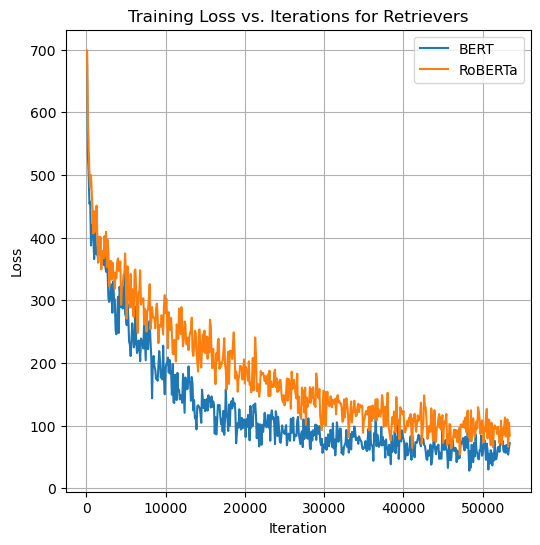

In [1]:
import matplotlib.pyplot as plt
import re

paths = {
    "BERT": "output/retriever-bert-base_20240505142203/results/log.txt",
    "RoBERTa": "output/retriever-roberta-base_20240506161410/results/log.txt"
}

def read_and_extract_loss(path):
    # Regular expression to match lines with loss values
    loss_pattern = re.compile(r'(\d+)\s*:\s*loss\s*=\s*(\d+\.\d+)')

    losses = {}

    with open(path, 'r') as file:
        for line in file:
            match = loss_pattern.search(line)
            if match:
                iteration = int(match.group(1))
                loss = float(match.group(2))
                losses[iteration] = loss
    
    return losses

plt.figure(figsize=(6, 6))
   
for model, path in paths.items():
    losses = read_and_extract_loss(path)
    
    iterations = sorted(losses.keys())
    loss_values = [losses[i] for i in iterations]

    plt.plot(iterations, loss_values, label=model)

plt.title('Training Loss vs. Iterations for Retrievers')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig("figures/retriever_loss.png")
plt.show()
        

## Plot Retriever Accuracy

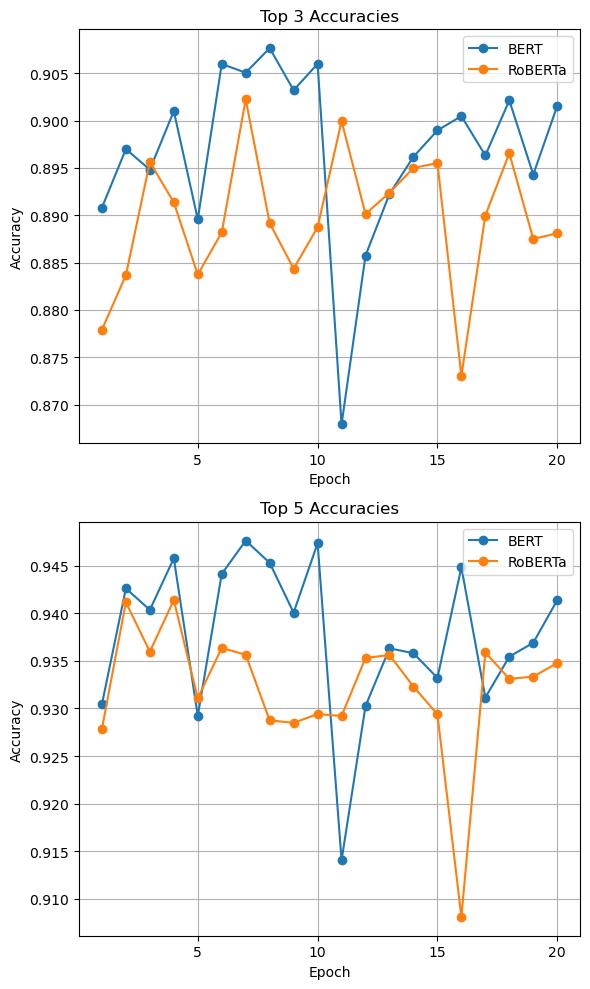

In [2]:
paths = {
    "BERT": "output/retriever-bert-base_20240505142203/results/log.txt",
    "RoBERTa": "output/retriever-roberta-base_20240506161410/results/log.txt"
}

def read_and_extract_accuracy(path):
    # Regular expressions to match lines with Top 3 and Top 5 accuracy values
    top3_pattern = re.compile(r'Top 3:\s*(\d+\.\d+)')
    top5_pattern = re.compile(r'Top 5:\s*(\d+\.\d+)')

    top3_accuracies = []
    top5_accuracies = []

    with open(path, 'r') as file:
        for line in file:
            top3_match = top3_pattern.search(line)
            top5_match = top5_pattern.search(line)
            if top3_match:
                top3_accuracies.append(float(top3_match.group(1)))
            if top5_match:
                top5_accuracies.append(float(top5_match.group(1)))

    return top3_accuracies, top5_accuracies

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 10))

for model, path in paths.items():
    top3_accuracies, top5_accuracies = read_and_extract_accuracy(path)
    ax1.plot(range(1, len(top3_accuracies) + 1), top3_accuracies, marker='o', label=model)   
    ax2.plot(range(1, len(top5_accuracies) + 1), top5_accuracies, marker='o', label=model)

ax1.set_title('Top 3 Accuracies')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_xticks([5, 10, 15, 20])
ax1.legend()
ax1.grid(True)

ax2.set_title('Top 5 Accuracies')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_xticks([5, 10, 15, 20])
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.savefig("figures/retriever_acc.png")
plt.show()


## Plot Generator Loss

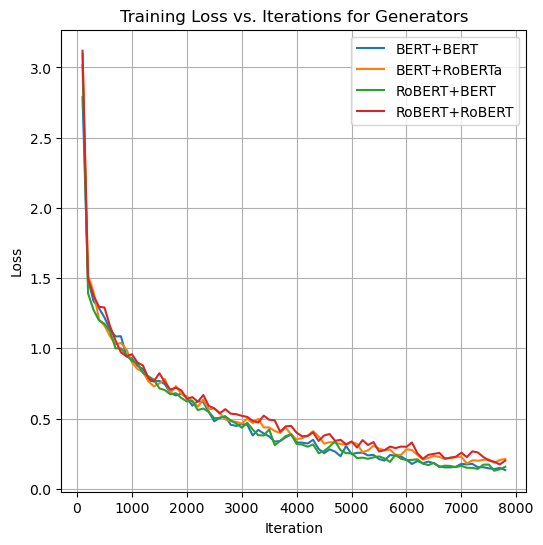

In [3]:
paths = {
    "BERT+BERT": "output/generator-bert-base-from-bert-base_20240506002248/results/log.txt",
    "BERT+RoBERTa": "output/generator-roberta-base-from-bert-base_20240506114948/results/log.txt",
    "RoBERT+BERT": "output/generator-bert-base-from-roberta-base_20240507014907/results/log.txt",
    "RoBERT+RoBERT": "output/generator-roberta-base-from-roberta-base_20240507015008/results/log.txt"
}

def read_and_extract_loss(path):
    # Regular expression to match lines with loss values
    loss_pattern = re.compile(r'(\d+)\s*:\s*loss\s*=\s*(\d+\.\d+)')
    
    losses = {}

    with open(path, 'r') as file:
        for line in file:
            match = loss_pattern.search(line)
            if match:
                iteration = int(match.group(1))
                loss = float(match.group(2))
                losses[iteration] = loss
    
    return losses

plt.figure(figsize=(6, 6))
   
for model, path in paths.items():
    losses = read_and_extract_loss(path)

    iterations = sorted(losses.keys())
    loss_values = [losses[i] for i in iterations]

    plt.plot(iterations, loss_values, label=model)

plt.title('Training Loss vs. Iterations for Generators')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig("figures/generator_loss.png")
plt.show()


## Plot Generator Accuracy

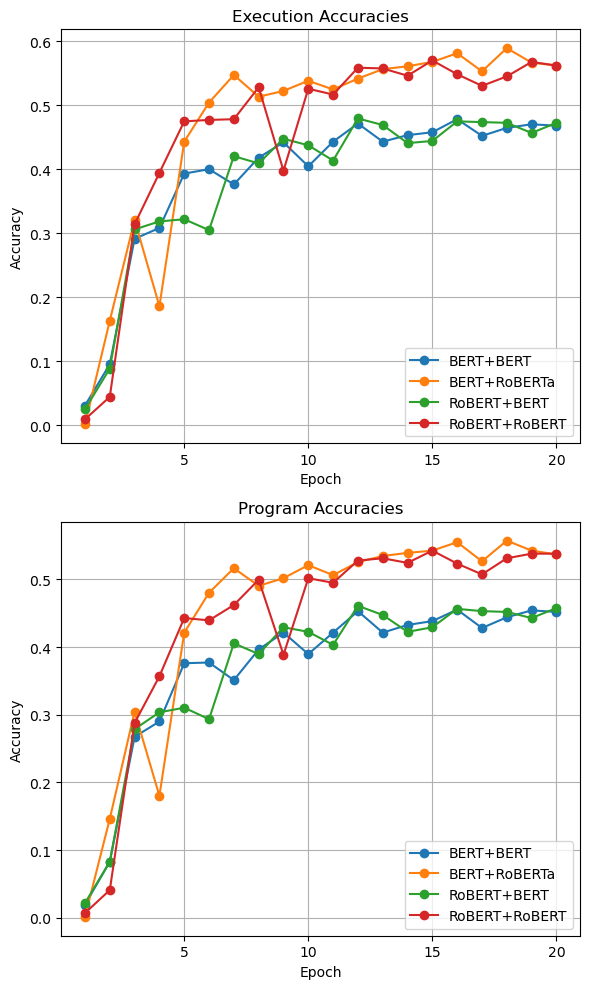

In [4]:
paths = {
    "BERT+BERT": "output/generator-bert-base-from-bert-base_20240506002248/results/log.txt",
    "BERT+RoBERTa": "output/generator-roberta-base-from-bert-base_20240506114948/results/log.txt",
    "RoBERT+BERT": "output/generator-bert-base-from-roberta-base_20240507014907/results/log.txt",
    "RoBERT+RoBERT": "output/generator-roberta-base-from-roberta-base_20240507015008/results/log.txt"
}

def read_and_extract_accuracy(path):
    # Regular expressions to match lines with execution and program accuracies
    acc_pattern = re.compile(r'exe acc: (\d+\.\d+) prog acc: (\d+\.\d+)')
    
    exe_accs = []
    prog_accs = []

    with open(path, 'r') as file:
        for line in file:
            match = acc_pattern.search(line)
            if match:
                exe_acc = float(match.group(1))
                prog_acc = float(match.group(2))
                exe_accs.append(exe_acc)
                prog_accs.append(prog_acc)

    return exe_accs, prog_accs
    
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 10))

for model, path in paths.items():
    exe_accs, prog_accs = read_and_extract_accuracy(path)
    ax1.plot(range(1, len(exe_accs) + 1), exe_accs, marker='o', label=model)   
    ax2.plot(range(1, len(prog_accs) + 1), prog_accs, marker='o', label=model)

ax1.set_title('Execution Accuracies')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_xticks([5, 10, 15, 20])
ax1.legend()
ax1.grid(True)

ax2.set_title('Program Accuracies')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_xticks([5, 10, 15, 20])
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.savefig("figures/generator_acc.png")
plt.show()


## Examples

### Correct example

In [5]:
import json

pred_path = "output/inference_only_20240508183018_generator-roberta-base-from-bert-base/results/test/full_results.json"

with open(pred_path, "r") as file:
    results = json.load(file)

def show_example(result):
    print("*"*20)
    print("pre_text:", result["pre_text"])
    print("*"*20)
    print("table:", result["table"])
    print("*"*20)
    print("post_text:", result["post_text"])
    print("*"*20)
    print("retrieved:", result["qa"]["model_input"])
    print("*"*20)
    print("question:", result["qa"]["question"])
    print("*"*20)
    print("label:", result["qa"]["program"])
    print("*"*20)
    print("pred:", result["qa"]["predicted"])
    print("*"*20)

show_example(results[0])

********************
pre_text: ['entergy corporation and subsidiaries management 2019s financial discussion and analysis a result of the entergy louisiana and entergy gulf states louisiana business combination , results of operations for 2015 also include two items that occurred in october 2015 : 1 ) a deferred tax asset and resulting net increase in tax basis of approximately $ 334 million and 2 ) a regulatory liability of $ 107 million ( $ 66 million net-of-tax ) as a result of customer credits to be realized by electric customers of entergy louisiana , consistent with the terms of the stipulated settlement in the business combination proceeding .', 'see note 2 to the financial statements for further discussion of the business combination and customer credits .', 'results of operations for 2015 also include the sale in december 2015 of the 583 mw rhode island state energy center for a realized gain of $ 154 million ( $ 100 million net-of-tax ) on the sale and the $ 77 million ( $ 47 

### Incorrect example

In [6]:
show_example(results[19])

********************
pre_text: ['jpmorgan chase & co./2010 annual report 273 the following table presents the u.s .', 'and non-u.s .', 'components of income before income tax expense/ ( benefit ) and extraordinary gain for the years ended december 31 , 2010 , 2009 and 2008 .', 'year ended december 31 , ( in millions ) 2010 2009 2008 .']
********************
table: [['year ended december 31 ( in millions )', '2010', '2009', '2008'], ['u.s .', '$ 16568', '$ 6263', '$ -2094 ( 2094 )'], ['non-u.s. ( a )', '8291', '9804', '4867'], ['income before incometax expense/ ( benefit ) andextraordinary gain', '$ 24859', '$ 16067', '$ 2773']]
********************
post_text: ['non-u.s. ( a ) 8291 9804 4867 income before income tax expense/ ( benefit ) and extraordinary gain $ 24859 $ 16067 $ 2773 ( a ) for purposes of this table , non-u.s .', 'income is defined as income generated from operations located outside the u.s .', 'note 28 2013 restrictions on cash and intercompany funds transfers the busine